In [57]:
import numpy as np
import scipy.stats
import scipy.misc
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')

%matplotlib inline

# Week 4 Probabilities in the Powerball Lottery
For this week's discussion, I thought I'd take a look at probabilities and odds for Powerball. With the recent Powerball craze surrounding record breaking jackpots, there were numerous articles discussing the ever-so-distant chances at winning the $1.5 billion jackpot. 

Specifically, I liked [this article in Wired](http://www.wired.com/2016/01/the-fascinating-math-behind-why-you-wont-win-powerball/) on 'Why You Won't Win Powerball' that also took a look at expected value of a $2 Powerball ticket. In addition, of course, FiveThirtyEight had a [number of good articles](http://fivethirtyeight.com/features/billion-dollar-powerball-lottery/). Lastly, the [Powerball website](http://www.powerball.com/powerball/pb_prizes.asp) had some interesting odds to check out.

For off, I wanted to verify the calculation of the overall odds of winning the jackpot, which is often quoted as 1 in more than 292 million. To do that I had to snoop in chapter 8 a little bit to get the number of possible combinations. To win the grand prize in Powerball, you need to get all 5 white balls correct, which have values from 1 to 69, as well as the Powerball which has values from 1 to 26.

So, with a bit of Python, we can see that the Powerball jackpot has indeed odds of winning of 1 in 292,201,338  or 0.0000000034%.  Or, in other words, the odds are 292,201,337 to 1 against you winning the jackpot.

### Odds of a Winning Combination

In [3]:
white_balls = 5
white_numbers = 69
power_balls = 1
power_numbers = 26

white_combinations = int(scipy.misc.comb(white_numbers, white_balls))
power_combinations = int(scipy.misc.comb(power_numbers, power_balls))
total_combinations = white_combinations*power_combinations

In [4]:
print 'white_combinations \t{0:,}'.format(white_combinations)
print 'power_combinations \t{0:,}'.format(power_combinations)
print 'total_combinations \t{0:,}'.format(total_combinations)
print 'probability \t\t{0:.10f}%'.format(1.0/total_combinations)
print '\t\t\t1 in {0:,}'.format(total_combinations)
print 'odds \t\t\t{0:,} to 1'.format(total_combinations-1)

white_combinations 	11,238,513
power_combinations 	26
total_combinations 	292,201,338
probability 		0.0000000034%
			1 in 292,201,338
odds 			292,201,337 to 1


### Odds of winning \$1MM
I was also intrigued by the stats on the Powerball website re: the probability of winning their 
\$1MM prize, which requires all 5 white balls to be correct, but not the Powerball. They claim that you have a '1 in 11,688,053.52' chance of winning \$1MM. Since this precludes you also getting the Powerball correct, I figure we should calculate this as the probability of getting all 5 white balls correct x the probability of not getting the Powerball (i.e. the complement to getting the Powerball):

M: winning the million dollar prize, W: getting all five white balls correct, PB: getting the Powerball correct

$P(M) = P(W) P(PB') = P(W) (1-P(PB))$

So,

In [5]:
# odds of $1MM
mm = (1.0/white_combinations)*(1-1.0/power_combinations)
print 'probability\t {0:.10f}%'.format(mm)
print '\t\t 1 in {0:,}'.format(1./mm)

probability	 0.0000000856%
		 1 in 11,688,053.52


## Odds of splitting the jackpot
Lastly, the FireThirtyEight article also worked through the odds of having to split the jackpot, i.e. there is more than one winning ticket. This depends on the number of tickets sold, and given the hype surrounding this jackpot, a record number of tickets was expected to be sold. Through extrapolation from prior drawings, the authors arrived at an estimate of just over 1 billion tickets sold (which might be admittedly high). Based on this number, they claim a 97% chance of at least one winner.

From some of the article commentary surrounding this stat, I learned that this was likely computed using a [binomial distribution](https://www.wikiwand.com/en/Binomial_distribution), so using Python's [scipy](http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.binom.html) module I wanted to see if we can get close to this by computing the chances of having no winner:

In [9]:
from scipy.stats import binom

# estimated tickets sold
n = 1.008*1e9 
k = 1
p = 1.0/total_combinations

In [10]:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print mean, var, skew, kurt

3.44967619553 3.44967618372 0.538407166358 0.289882274802


In [11]:
print 'probability of 0 winners:\t\t{0:.4f}%'.format(binom.pmf(0, n, p)*100)
print 'probability of 1 winner:\t\t{0:.4f}%'.format(binom.pmf(1, n, p)*100)
print 'probability of at least 1 winner:\t{0:.4f}%'.format((1-binom.pmf(0, n, p))*100)
print 'probability of 2 winners:\t\t{0:.4f}%'.format(binom.pmf(2, n, p)*100)

probability of 0 winners:		3.1756%
probability of 1 winner:		10.9547%
probability of at least 1 winner:	96.8244%
probability of 2 winners:		18.8952%


#### Binomial Distribution Plot
First, we'll take a look at the binomial distribution for our Powerball probabilities 

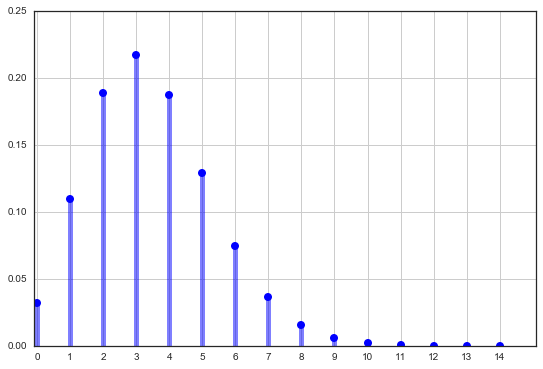

In [66]:
fig = plt.figure(figsize=(9, 6))

plt.grid(True)

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.999999, n, p))
plt.xlim(-.1, binom.ppf(0.999999, n, p) + .1)
plt.xticks(x)
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

Then, we can compute the probability of having to spit the jackpot with at least one more winner by finding complemenet to the probabilities of having exactly 0 and 1 winners: 

In [14]:
prob_0_winners = binom.pmf(0, n, p)
prob_1_winner = binom.pmf(1, n, p)
prob_2_winners = 1 - (prob_0_winners + prob_1_winner)

In [15]:
print 'probability\t {0:.2f}%'.format(prob_2_winners*100)
print 'odds \t\t 1 in {0:,}'.format(1./prob_2_winners)

probability	 85.87%
odds 		 1 in 1.1645555349


Thus based on the estimated 1.008 billion tickets sold, there's an 86% chance a winner would have to split the jackpot with at least one more person.

Another way to think of the probability of having more than 1 winner is to look at the cumulative probability distribution:

#### Cumulative Binomial Distribution

In [16]:
binom.cdf(x, n, p)

array([ 0.03175592,  0.14130354,  0.3302555 ,  0.54752981,  0.73491133,
        0.86419244,  0.9385221 ,  0.97515256,  0.99094797,  0.99700231,
        0.99909086,  0.99974584,  0.99993413,  0.99998409,  0.99999641])

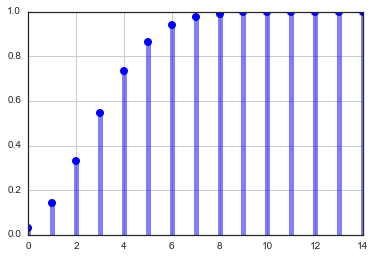

In [18]:
fig, ax = plt.subplots(1, 1)
# plt.xlim(-.1, 4.1)
plt.grid(True)

ax.plot(x, binom.cdf(x, n, p), 'bo', ms=8, label='binom cdf')
ax.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

In [17]:
(1 - binom.cdf(1, n, p))

0.85869645564152686

Which gives us the same result:  0.8586

### Probability of Winners by # of Tickets Sold
We can also graph the distribution functions for 0, 1 and more than 1 winner by tickets sold. To do that, I set up a range up to the maximum tickets sold (estimated anyway) of 1 billion and pass that into the respective functions to get the probability for 0, 1, and more than 1 for that level of tickets (assuming our previously calculated probability of winning the jackpot)

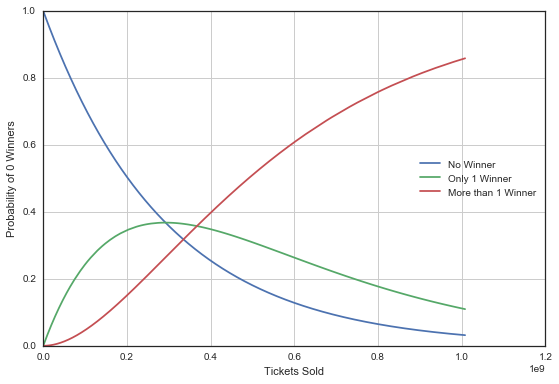

In [19]:
tickets = np.arange(1000000, n, 1000)

fig = plt.figure(figsize=(9, 6))

plt.grid(True)

plt.xlabel('Tickets Sold')
plt.ylabel('Probability of 0 Winners')

plt.plot(tickets, binom.pmf(0, tickets, p), '-', label='No Winner')
plt.plot(tickets, binom.pmf(1, tickets, p), '-', label='Only 1 Winner')
plt.plot(tickets, 1 - binom.cdf(1, tickets, p), '-', label='More than 1 Winner')

plt.legend(loc='best')
plt.show()

### Expected Value
Another topic I wanted to explore is what is the expected value of a Powerball given a certain jackpot?

Using the tax assumptions from [this article on CNBC](http://www.cnbc.com/2016/01/11/tallying-the-big-tax-bite-of-a-14b-powerball-win.html), and the jackpot amount from above, it looks like that once you factor in the discount inherent in taking the lumpsum amount, taxes etc, even this record jackpot has a negative net expected value of around \$1.73 for a \$2 ticket.

Obviously we can play around with the assumptions, but while the raw expected value looks great at this level, and the breakeven for a \$2 given our probabilities calculated earlier looks to be around a \$600 jackpot, the net expected value never approaches the breakeven line.

In [56]:
jackpot = 1586000000
lump_sum_discount = (1-.38)
federal_tax = .396
state_local_tax = .15


print 'expected value \t\t${0:.2f}'.format(1.0/total_combinations * jackpot)
print 'net expected value \t${0:.2f}'.format(1.0/total_combinations * jackpot * lump_sum_discount * 
                                             (1-federal_tax) * (1-state_local_tax))

print 'take-home jackpot\t${0:,}'.format(jackpot * lump_sum_discount * (1-federal_tax) * (1-state_local_tax))

expected value 		$5.43
net expected value 	$1.73
take-home jackpot	$504,836,488.0


Plotting expected value of a ticket against a range of possible jackpots from $100 million to the latest record jackpot:

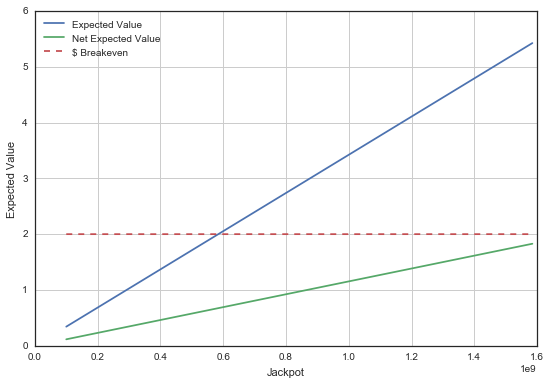

In [47]:
jackpots = np.arange(100000000, jackpot, 1000000)

fig = plt.figure(figsize=(9, 6))

ev = 1.0/total_combinations * jackpots
ev_net = ev * lump_sum_discount * (1-federal_tax) * (1-gambling_tax)
plt.grid(True)

plt.xlabel('Jackpot')
plt.ylabel('Expected Value')

plt.plot(jackpots, ev, '-', label='Expected Value')
plt.plot(jackpots, ev_net, '-', label='Net Expected Value')
plt.plot(jackpots, jackpots * 0 + 2, '--', label='$ Breakeven')
# plt.plot(tickets, 1 - binom.cdf(1, tickets, p), '-', label='More than 1 Winner')

plt.legend(loc='best')
plt.show()